# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MDS 2030 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

# Tarea 3: Análisis exploratorio de datos.

***
## Instrucciones Generales.
- Esta Tarea debe ser desarrollada completamente en lenguaje de programación Python, y estructurarse en formato de Jupyter Notebook.
- El Notebook debe estrar estructurado en forma ordenado, seguir buenas prácticas de escritura y programación, e incluir comentarios o celdas de markdown suficientes para explicar claramente todos los códigos computacionales.
- Para cada pregunta, incluya un breve **análisis de los gráficos y/o resúmentes estadísticos generados**, de manera de responder a las preguntas planteadas.

***
## Introducción.


Continuando con el caso de estudio desarrollado en las Tareas 1 y 2, suponga que ud.está a cargo del desarrollo de un estudio del mercado laboral de científicos de datos en latinoamérica, para lo cual necesita construir, procesar y analizar una base de datos con las ofertas de trabajo publicadas en distintos países de la región.

En la **Tarea 1**, ud. avanzó en la primera etapa de construcción de la base de datos, utilizando web scraping para extraer los datos de ofertas de empleo en *data science* publicados en la red Linkedin, para una ciudad o país. Este proceso fue repetido y ampliado para todos los países de sudamérica, para construir una base de datos más amplia para su estudio.  

Para considerar en el análisis el contexto económico y tecnológico de cada país, entre los datos se incluirán también otras variables como el *Índice global de innovación* (https://www.globalinnovationindex.org/Home), disponible online para distintos países del mundo.

En la **Tarea 2**, ud. realizó el proceso de integración, limpieza y procesamiento de las bases de datos obtenidas mediante webscraping, generando así un conjunto de datos apto para distintos tipos de análisis.

Para esta **Tarea 3**, se ha enriquecido la base de datos generada en la Tarea 2, incorporando variables relativas a: salarios ofrecidos para cada puesto de trabajo, años de experiencia y nivel de educación exigidos, y un score de ambiente laboral de cada empresa ofertante. Esta es la base de datos final a utilizar para el análisis y modelamiento de datos.

El objetivo de esta Tarea, es realizar un análisis exploratorio de los datos, comprender las relaciones o tendencias entre distintas variables, y obtener conclusiones útiles que permitan esbozar un modelo predictivo de los salarios de cientistas de datos como función de su país, formación y experiencia profesional, y/o indicadores de la compañía.

## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el siguiente link:

https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea3/datos_t3.csv

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Location`: ubicación del empleo.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `Url`: URL del anuncio.
* `CountryScore`: *Índice global de innovación* del país del anuncio.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: tres años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.

**Nota**: estos datos han sido parcialmente simulados para efectos de este ejercicio, no los utilice para ninguna toma de decisión real.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings

In [9]:
df = pd.read_csv("datost3.csv", delimiter=";")



In [10]:
df

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
995,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Lead Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/lead-ruby-on...,NaN,1,1,4,5.924260,606
996,Guyana,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,https://gy.linkedin.com/jobs/view/sr-security-...,NaN,1,6,10,4.856359,1570
997,Guyana,Guyana,Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,1,5,6.040759,449
998,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,2,7,4.944933,696


### 1. ¿Cómo se distribuyen los datos de empleos por país?  

Genere un gráfico de barras o resumen estadístico que muestre claramente esta distribución. Además comente, ¿Están balanceados los datos, o puede identificar algún(os) países para los cuales los datos sean poco representativos?

*Funciones útiles:* `sns.countplot()`,`pd.groupby()`,`pd.pivot_table()`.

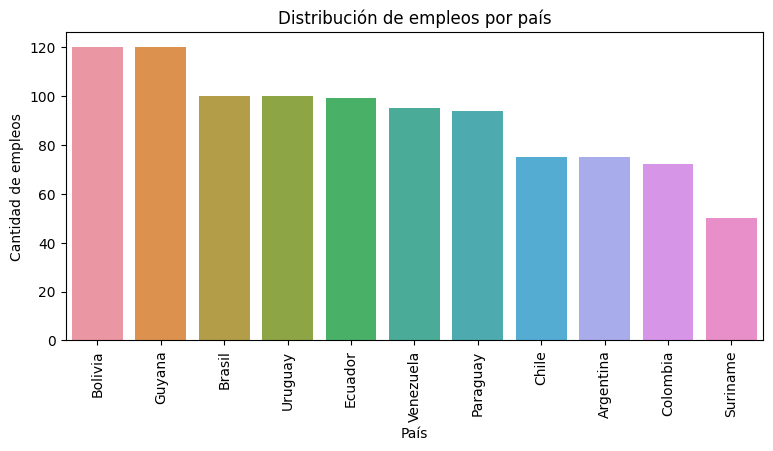

Resumen estadístico de empleos por país:
Bolivia      120
Guyana       120
Brasil       100
Uruguay      100
Ecuador       99
Venezuela     95
Paraguay      94
Chile         75
Argentina     75
Colombia      72
Suriname      50
Name: Country, dtype: int64


In [17]:
empleosPorPais = df['Country'].value_counts()
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x='Country', order=empleosPorPais.index)
plt.xticks(rotation=90)
plt.title('Distribución de empleos por país')
plt.xlabel('País')
plt.ylabel('Cantidad de empleos')
plt.show()
print("Resumen estadístico de empleos por país:")
print(empleosPorPais)


### Comentarios:

Los datos no estan del todo balanceados, ya que la diferencia entre el que más y menos(Bolivia/Guyana y Suriname) empleos tienen es una cantidad significativa. Suriname al tener pocos empleos indica que podria ser menos representativo con respecto a los otros paises.

### 2. Estudie la distribución de salarios en el dataset, y analice la existencia de datos anómalos. 

**a)** Genere un histograma para la variable *SalaryUSD*, incluyendo una curva de densidad de probabilidad (kde).<br>
**b)** ¿Puede identificar valores fuera de rango o anómalos? ¿Por qué son anómalos, y a qué países corresponden?<br>
**c)** ¿Qué tratamiento daría ud. a esos datos anómalos? (Ej: nada, eliminar, corregir, etc.) Justifique e implemente su propuesta. <br>

*Funciones útiles:* `sns.histplot()`, `pd.describe()`.

In [27]:
df

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
995,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Lead Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/lead-ruby-on...,NaN,1,1,4,5.924260,606
996,Guyana,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,https://gy.linkedin.com/jobs/view/sr-security-...,NaN,1,6,10,4.856359,1570
997,Guyana,Guyana,Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,1,5,6.040759,449
998,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,2,7,4.944933,696


In [25]:
df['Company'].value_counts()

Aha!                                                       60
Scopic Software                                            48
Trabajo Joven Sí Hay                                       36
NICE Ltd                                                   33
FullStack Labs                                             31
                                                           ..
PhillyTech | SaaS and Hi-Tech Growth & Hiring Solutions     1
STRATEGIC CORP                                              1
PMMC                                                        1
HireResources                                               1
Salt                                                        1
Name: Company, Length: 247, dtype: int64

In [30]:
df.describe()

,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
count,515.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,26.896117,0.519000,2.973000,6.985000,5.070424,1722.12300
std,4.617231,0.499889,1.086946,1.480191,2.037362,2935.96947
min,20.300000,0.000000,0.000000,2.000000,-1.513845,42.00000
25%,22.600000,0.000000,2.000000,6.000000,3.707573,933.00000
50%,28.600000,1.000000,3.000000,7.000000,5.093822,1475.00000
75%,29.200000,1.000000,4.000000,8.000000,6.424400,2134.00000
max,34.000000,1.000000,6.000000,11.000000,12.105570,78600.00000


### Comentario1


Lo primero es graficar los datos originales para ver su distribucón y además mostrar estadistica asociada

### A) y B)

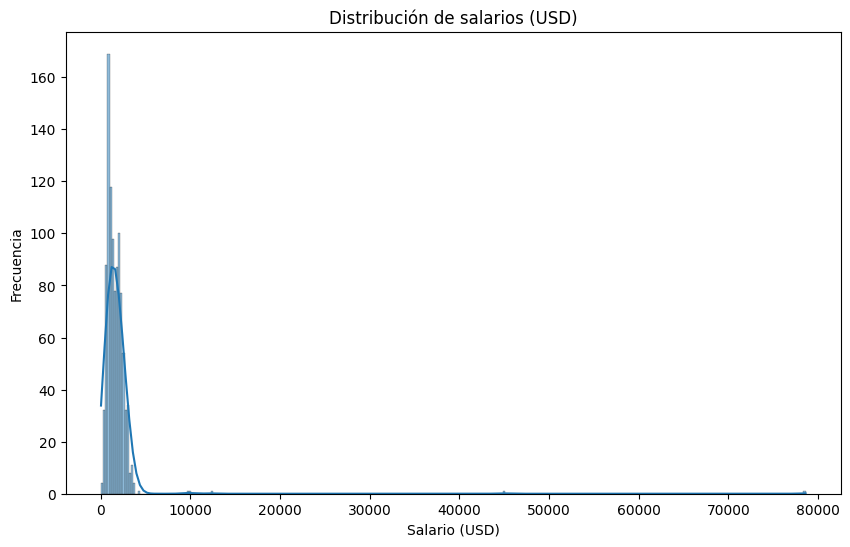

Estadísticas descriptivas de SalaryUSD:
count     1000.00000
mean      1722.12300
std       2935.96947
min         42.00000
25%        933.00000
50%       1475.00000
75%       2134.00000
max      78600.00000
Name: SalaryUSD, dtype: float64

Valores anómalos (fuera del rango IQR):
      Country  SalaryUSD
7       Chile       4144
835  Suriname      78600
838  Suriname       9801
844  Suriname       9870
940    Guyana      44900
953    Guyana      12340


In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalaryUSD'], kde=True)
plt.title('Distribución de salarios (USD)')
plt.xlabel('Salario (USD)')
plt.ylabel('Frecuencia')
plt.show()
dfDescribe = df['SalaryUSD'].describe()
print("Estadísticas descriptivas de SalaryUSD:")
print(dfDescribe)
Q1 = dfDescribe['25%']
Q3 = dfDescribe['75%']
IQR = Q3 - Q1
limInferior = Q1 - 1.5 * IQR
limSuperior = Q3 + 1.5 * IQR
salariosAnómalos = df[(df['SalaryUSD'] < limInferior) | (df['SalaryUSD'] > limSuperior)]
if not salariosAnómalos.empty:
    print("\nValores anómalos (fuera del rango IQR):")
    print(salariosAnómalos[['Country', 'SalaryUSD']])




### Comentario2

Podemos apreciar por el grafico y las estadistica que hay datos anónamalos. Por lo tanto seria bueno excluir aquellos registros que esten fuera del rango intercuartílico 

Número de registros antes del filtrado: 1000
Número de registros después del filtrado: 994


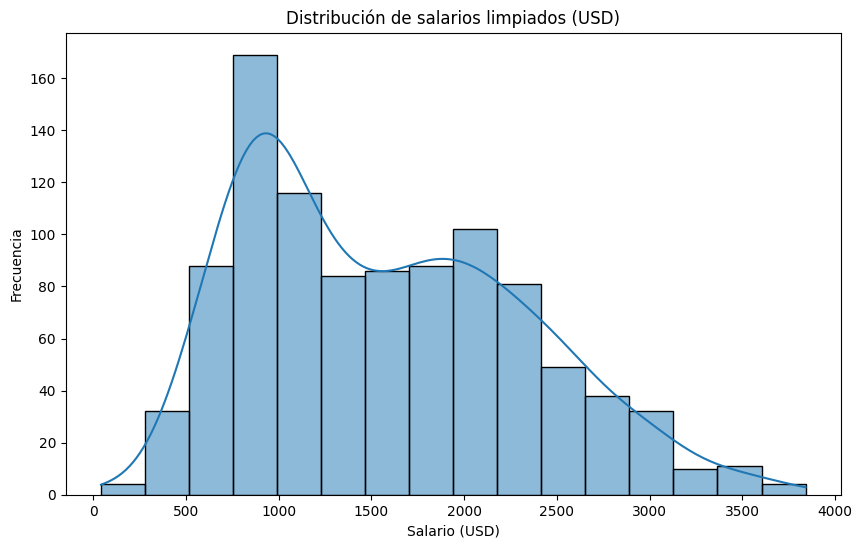

In [40]:
dfFiltrado = df[(df['SalaryUSD'] >= limInferior) & (df['SalaryUSD'] <= limSuperior)]
print(f"Número de registros antes del filtrado: {len(df)}")
print(f"Número de registros después del filtrado: {len(dfFiltrado)}")
plt.figure(figsize=(10, 6))
sns.histplot(dfFiltrado['SalaryUSD'], kde=True)
plt.title('Distribución de salarios limpiados (USD)')
plt.xlabel('Salario (USD)')
plt.ylabel('Frecuencia')
plt.show()


In [43]:
indicesEliminados = df.index.difference(dfFiltrado.index)
registros_eliminados = df.loc[indicesEliminados]
print("Registros eliminados:")
registros_eliminados

Registros eliminados:


,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
7,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,Falabella,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,5,11,4.964838,4144
835,Suriname,"Centrum, Paramaribo, Suriname",Database Reliability Engineer (Remote),Percona,https://sr.linkedin.com/jobs/view/database-rel...,NaN,1,3,6,7.340831,78600
838,Suriname,"Centrum, Paramaribo, Suriname",Frontend Developer (Angular),Kingfisher Recruitment,https://sr.linkedin.com/jobs/view/frontend-dev...,NaN,1,4,8,8.187684,9801
844,Suriname,"Centrum, Paramaribo, Suriname",Back-end Developer,Kingfisher Recruitment,https://sr.linkedin.com/jobs/view/back-end-dev...,NaN,1,4,8,6.665769,9870
940,Guyana,Guyana,Sr. Platform Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-platform-...,NaN,0,1,5,4.971855,44900
953,Guyana,"No. 3, Mahaica-Berbice, Guyana",Sr. Software Engineer,Univision,https://gy.linkedin.com/jobs/view/sr-software-...,NaN,0,5,10,7.120389,12340


### 3. ¿Cómo se comparan en general los salarios promedio de Cientistas de Datos por país? 

Genere un gráfico de cajas que muestre la media y dispersión de los salarios para cada país y analice. 
¿Cuáles son los países con mayores y menores salarios medios?

*Funciones útiles:* `sns.boxplot()`

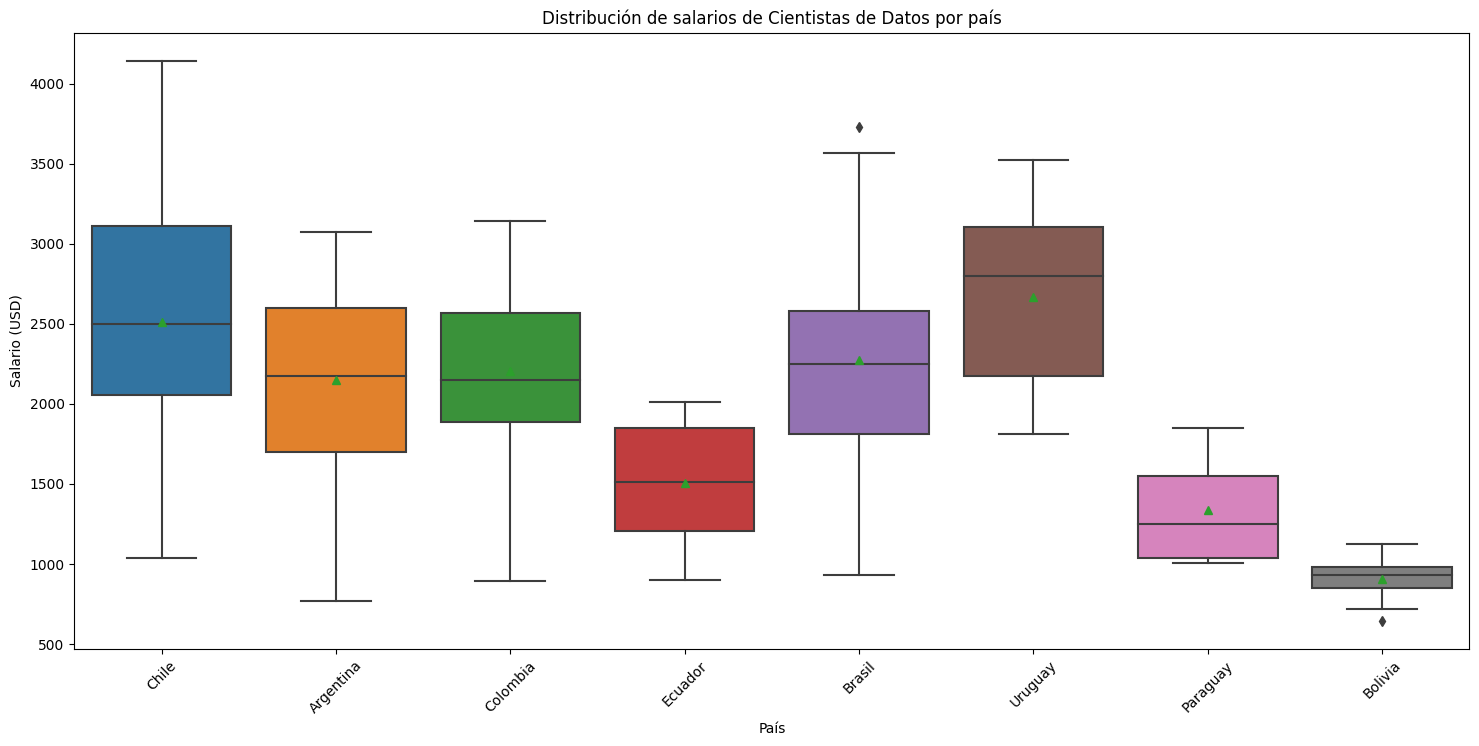

Estadisticas por país:


,count,mean,std,min,25%,50%,75%,max,IQR
Country,,,,,,,,,
Argentina,42.0,2147.000000,564.329561,769.0,1702.75,2176.5,2598.25,3072.0,895.50
Bolivia,15.0,908.133333,135.462629,645.0,848.50,932.0,980.00,1123.0,131.50
Brasil,63.0,2273.825397,574.969888,933.0,1811.00,2249.0,2578.50,3730.0,767.50
Chile,56.0,2511.357143,751.997859,1037.0,2057.75,2499.0,3109.00,4144.0,1051.25
Colombia,13.0,2206.000000,579.782718,892.0,1888.00,2150.0,2569.00,3145.0,681.00
Ecuador,7.0,1505.428571,436.229625,899.0,1205.00,1511.0,1852.00,2014.0,647.00
Paraguay,4.0,1337.750000,396.129924,1006.0,1036.00,1247.0,1548.75,1851.0,512.75
Uruguay,11.0,2670.636364,601.907679,1814.0,2176.00,2798.0,3108.50,3523.0,932.50


In [56]:
dfDataScience = df[df['Title'].str.contains('Data Scientist', case=False, na=False)]
plt.figure(figsize=(18, 8))
sns.boxplot(x='Country', y='SalaryUSD', data=dfDataScience, showmeans=True)
plt.title('Distribución de salarios de Cientistas de Datos por país')
plt.xlabel('País')
plt.ylabel('Salario (USD)')
plt.xticks(rotation=45)
plt.show()
dfStad = dfDataScience.groupby('Country')['SalaryUSD'].describe()
dfStad['IQR'] = dfStad['75%'] - dfStad['25%']
print("Estadisticas por país:")
dfStad


### Comentario:

En base a la información antes obtenida, podemos concluir los siguientes puntos.

1. Chile y Uruguay ofrecen los salarios más altos para el empleo de Cientistas de Datos, pero también muestran una gran variabilidad en estos salarios, en especial chile que es el pais que mayor IQR presenta.
2. Bolivia y Paraguay tienen los salarios más bajos, donde Bolvia muestra la menor dispersión. Lo que indica que en dicho pais los salarios para este empleo son muy parecidos.

### 4. ¿Influye el manejo del idioma inglés en los salarios? ¿Influye (o no) de la misma manera para todos los países?

Genere un **resumen estadístico y un gráfico** que le permitan responder fundadamente esta pregunta, y argumente su respuesta.

*Funciones útiles:* `sns.boxplot()`,`pd.groupby()`,`pd.pivot_table()`

### Comentario1

En primera instancia mostrare la data para los datos sin filtrar(con valores anómalos)

In [70]:
dfFiltroIdioma = df.groupby(['English', 'Country'])['SalaryUSD'].describe()
dfFiltroIdioma

count         mean           std     min      25%     50%  \
English Country                                                                
0       Argentina   44.0  1893.659091    504.418521   564.0  1575.25  1844.0   
        Bolivia     56.0   872.714286    196.034386   407.0   777.00   932.0   
        Brasil      57.0  1963.736842    451.560806   933.0  1646.00  1975.0   
        Chile       27.0  1928.481481    564.340689   854.0  1524.50  2012.0   
        Colombia    39.0  1977.538462    494.249236   892.0  1573.00  1888.0   
        Ecuador     48.0  1234.250000    302.992065   432.0  1007.00  1241.0   
        Guyana      60.0  1700.500000   5868.757610    74.0   645.25   808.0   
        Paraguay    45.0  1431.488889    372.529536   684.0  1127.00  1368.0   
        Suriname    21.0   650.809524    193.415516    42.0   549.00   658.0   
        Uruguay     40.0  1886.225000    472.079442   881.0  1710.00  1866.0   
        Venezuela   44.0   633.818182    156.773911   366.0   512.00   613.0   
1       Argentina   31.0  2307.483871    544.987882  1127.0  1997.00  2458.0   
        Bolivia     64.0  1072.328125    207.061915   645.0   908.00  1099.0   
        Brasil      43.0  2633.255814    507.180399  1646.0  2304.00  2524.0   
        Chile       48.0  2802.750000    621.155700  1646.0  2317.00  2865.0   
        Colombia    33.0  2362.242424    365.035617  1835.0  2045.00  2254.0   
        Ecuador     51.0  1633.235294    363.033199   792.0  1421.00  1654.0   
        Guyana      60.0  1037.233333    268.919266    81.0   920.00  1032.0   
        Paraguay    49.0  1896.673469    407.950435   885.0  1609.00  1851.0   
        Suriname    29.0  4135.862069  14508.812275   494.0   732.00   841.0   
        Uruguay     60.0  2322.116667    448.091966  1555.0  1969.00  2280.0   
        Venezuela   51.0   833.313725    173.997298   439.0   732.00   841.0   

                       75%      max  
English Country                      
0       Argentina  2253.00   2918.0  
        Bolivia    1015.75   1314.0  
        Brasil     2414.00   2853.0  
        Chile      2286.00   2865.0  
        Colombia   2228.50   3145.0  
        Ecuador    1475.00   1978.0  
        Guyana      925.50  44900.0  
        Paraguay   1650.00   2414.0  
        Suriname    768.00    914.0  
        Uruguay    2124.00   3264.0  
        Venezuela   713.00   1006.0  
1       Argentina  2688.00   3328.0  
        Bolivia    1219.00   1481.0  
        Brasil     2962.00   3730.0  
        Chile      3200.25   4144.0  
        Colombia   2673.00   3145.0  
        Ecuador    1888.00   2337.0  
        Guyana     1216.75   1570.0  
        Paraguay   2172.00   2615.0  
        Suriname    987.00  78600.0  
        Uruguay    2564.75   3523.0  
        Venezuela   933.00   1280.0

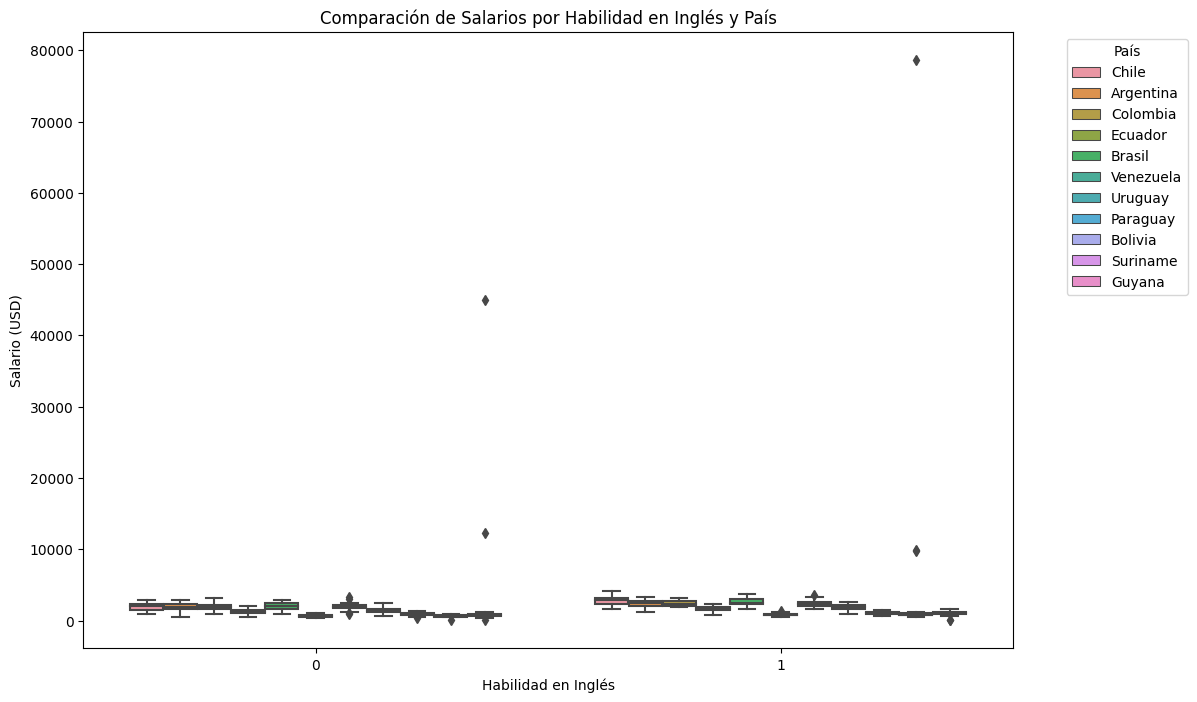

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='English', y='SalaryUSD', hue='Country', data=df)
plt.title('Comparación de Salarios por Habilidad en Inglés y País')
plt.xlabel('Habilidad en Inglés')
plt.ylabel('Salario (USD)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Comentario2

Tal como ocurrio antes, lo mejor seria excluir estos valores anómalos. Por lo tanto vuelvo a realizar lo mismo que antes, pero esta vez aplicado al dataframe dfFiltrado

In [73]:
dfFiltroIdioma2 = dfFiltrado.groupby(['English', 'Country'])['SalaryUSD'].describe()
dfFiltroIdioma2

count         mean         std     min      25%     50%  \
English Country                                                              
0       Argentina   44.0  1893.659091  504.418521   564.0  1575.25  1844.0   
        Bolivia     56.0   872.714286  196.034386   407.0   777.00   932.0   
        Brasil      57.0  1963.736842  451.560806   933.0  1646.00  1975.0   
        Chile       27.0  1928.481481  564.340689   854.0  1524.50  2012.0   
        Colombia    39.0  1977.538462  494.249236   892.0  1573.00  1888.0   
        Ecuador     48.0  1234.250000  302.992065   432.0  1007.00  1241.0   
        Guyana      58.0   772.241379  218.622507    74.0   633.75   808.0   
        Paraguay    45.0  1431.488889  372.529536   684.0  1127.00  1368.0   
        Suriname    21.0   650.809524  193.415516    42.0   549.00   658.0   
        Uruguay     40.0  1886.225000  472.079442   881.0  1710.00  1866.0   
        Venezuela   44.0   633.818182  156.773911   366.0   512.00   613.0   
1       Argentina   31.0  2307.483871  544.987882  1127.0  1997.00  2458.0   
        Bolivia     64.0  1072.328125  207.061915   645.0   908.00  1099.0   
        Brasil      43.0  2633.255814  507.180399  1646.0  2304.00  2524.0   
        Chile       47.0  2774.212766  595.216254  1646.0  2317.00  2804.0   
        Colombia    33.0  2362.242424  365.035617  1835.0  2045.00  2254.0   
        Ecuador     51.0  1633.235294  363.033199   792.0  1421.00  1654.0   
        Guyana      60.0  1037.233333  268.919266    81.0   920.00  1032.0   
        Paraguay    49.0  1896.673469  407.950435   885.0  1609.00  1851.0   
        Suriname    26.0   833.423077  169.362611   494.0   732.00   813.5   
        Uruguay     60.0  2322.116667  448.091966  1555.0  1969.00  2280.0   
        Venezuela   51.0   833.313725  173.997298   439.0   732.00   841.0   

                       75%     max  
English Country                     
0       Argentina  2253.00  2918.0  
        Bolivia    1015.75  1314.0  
        Brasil     2414.00  2853.0  
        Chile      2286.00  2865.0  
        Colombia   2228.50  3145.0  
        Ecuador    1475.00  1978.0  
        Guyana      908.75  1234.0  
        Paraguay   1650.00  2414.0  
        Suriname    768.00   914.0  
        Uruguay    2124.00  3264.0  
        Venezuela   713.00  1006.0  
1       Argentina  2688.00  3328.0  
        Bolivia    1219.00  1481.0  
        Brasil     2962.00  3730.0  
        Chile      3139.50  3840.0  
        Colombia   2673.00  3145.0  
        Ecuador    1888.00  2337.0  
        Guyana     1216.75  1570.0  
        Paraguay   2172.00  2615.0  
        Suriname    946.50  1189.0  
        Uruguay    2564.75  3523.0  
        Venezuela   933.00  1280.0

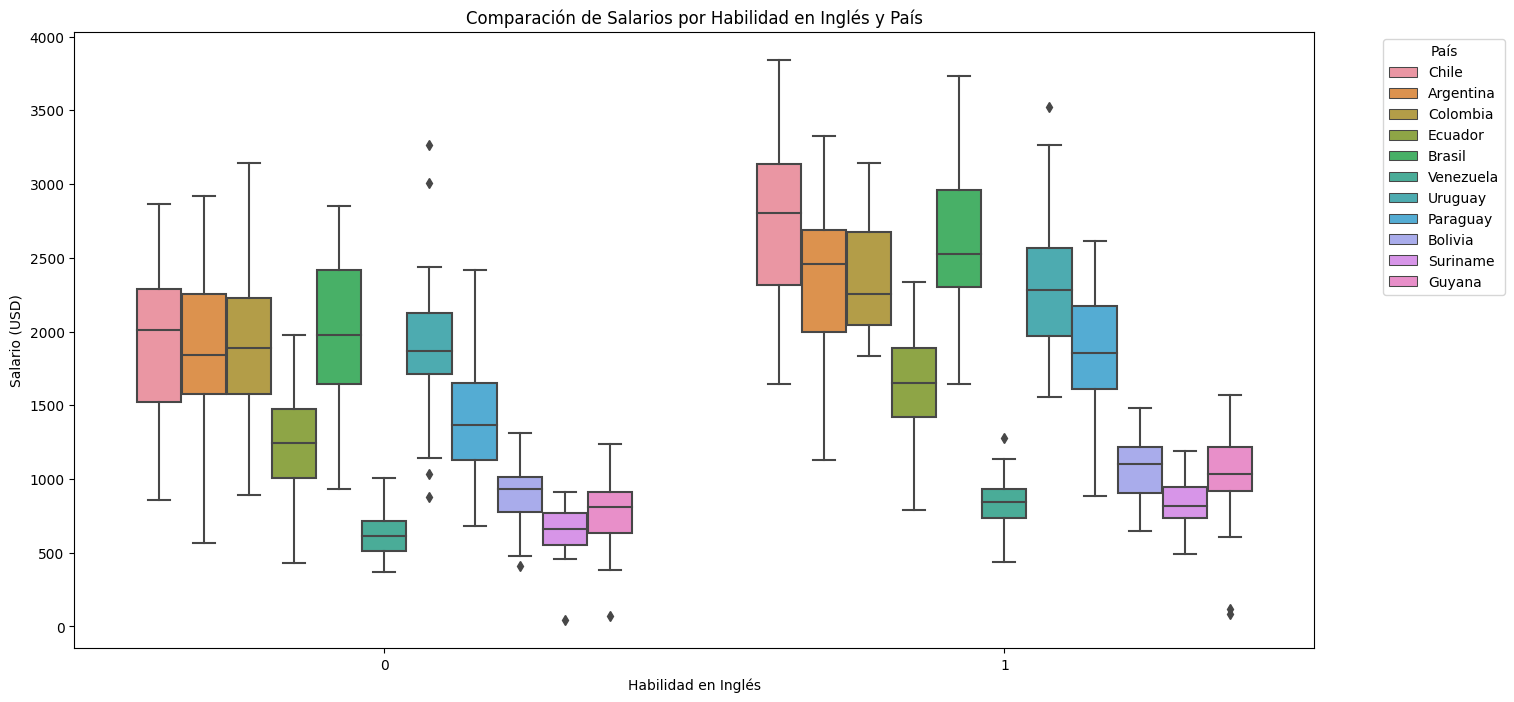

In [75]:

plt.figure(figsize=(16, 8))
sns.boxplot(x='English', y='SalaryUSD', hue='Country', data=dfFiltrado)
plt.title('Comparación de Salarios por Habilidad en Inglés y País')
plt.xlabel('Habilidad en Inglés')
plt.ylabel('Salario (USD)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Comentario3

1. Según lo mostrado en el gráfico y las estadisticas, se ve claramente una influencia positiva en el salario cuando hay un dominio del idioma ingles.
2. El impacto del manejo del ingles no es uniforme para todos los paises. Por lo tanto, el dominio del idioma ingles no influye de la misma manera para todos los países.

### 5. Analice los  años de experiencia y nivel educacional requeridos en los distintos países de sudamérica. ¿Son similares, o puede detectar alguna diferencia significativa para alguno(s)? 

Genere una **tabla resumen y gráficos** con los promedios de las variables *EducationLevel* y *YearsExperience* por país, y en base a ellos argumente su respuesta.

*Funciones útiles:* `sns.boxplot()`,`pd.groupby()`,`pd.pivot_table()`

In [84]:
resumen = dfDataScience.groupby('Country').agg({
    'EducationLevel': 'mean',
    'YearsExperience': 'mean'
}).reset_index()
resumen


,Country,EducationLevel,YearsExperience
0,Argentina,3.142857,7.309524
1,Bolivia,2.666667,6.666667
2,Brasil,3.126984,7.174603
3,Chile,2.857143,6.946429
4,Colombia,3.307692,7.230769
5,Ecuador,3.142857,7.285714
6,Paraguay,2.250000,6.500000
7,Uruguay,3.636364,8.090909


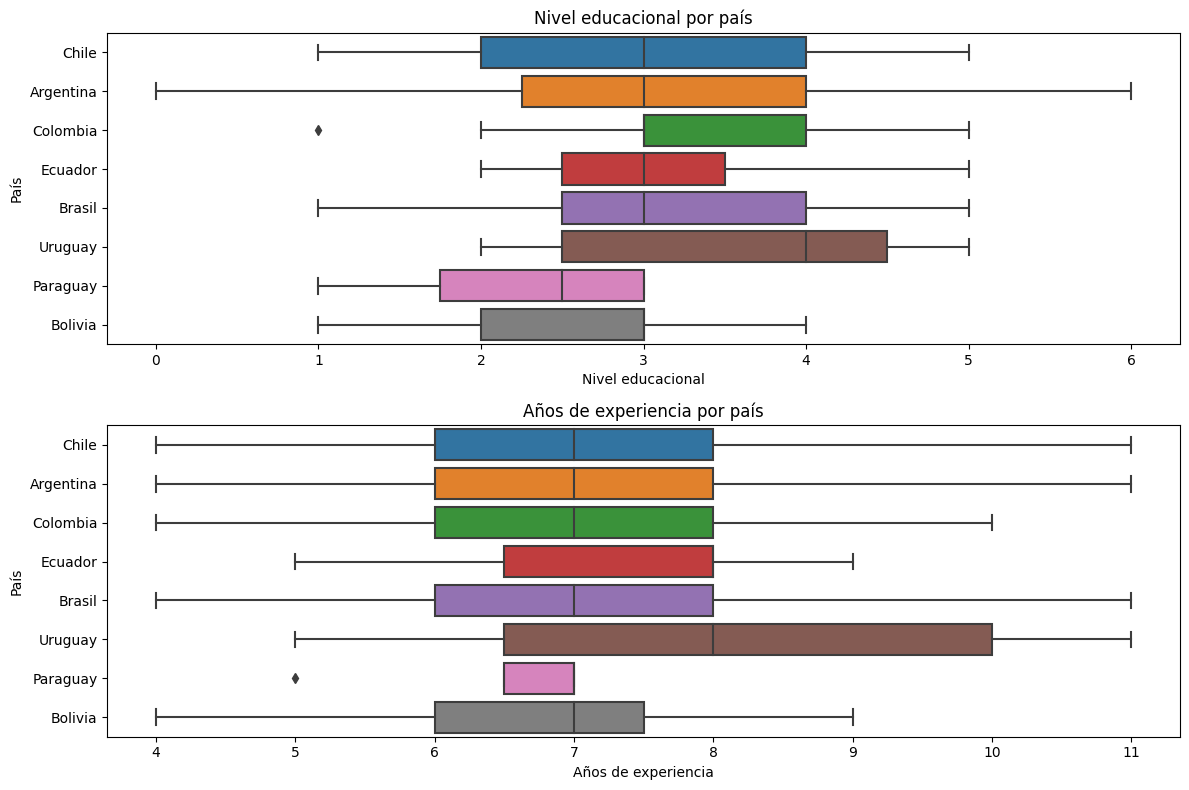

In [83]:
plt.figure(figsize=(12, 8))
# para educación
plt.subplot(2, 1, 1)
sns.boxplot(x='EducationLevel', y='Country', data=dfDataScience, orient='h')
plt.title('Nivel educacional por país')
plt.xlabel('Nivel educacional')
plt.ylabel('País')
#para experiencia
plt.subplot(2, 1, 2)
sns.boxplot(x='YearsExperience', y='Country', data=dfDataScience, orient='h')
plt.title('Años de experiencia por país')
plt.xlabel('Años de experiencia')
plt.ylabel('País')

plt.tight_layout()
plt.show()


#### Comentario:

En general, los países seleccionados tienen similitudes en los niveles educativos (alrededor de 3) y años de experiencia (alrededor de 7). Sin embargo, Uruguay presenta valores significativamente más altos tanto en educación como en experiencia para trabajos de data science en comparación al resto de paises. Esto podría deberse a diferentes factores, uno de ello seria que lo empleadores en dicho pais, valoran la experiencia por sobre lo demás.

### 6. Calcule y grafique la matriz de correlación para las variables numéricas del dataset. 

Analice los coeficientes de correlación entre *SalaryUSD* y otras variables del dataset. ¿Cuáles variables identifica como más correlacionadas, o más relevantes para construir un modelo predictivo de salarios?

*Funciones útiles:* `sns.heatmap()` ,`pd.corr()`

In [85]:
df

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
995,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Lead Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/lead-ruby-on...,NaN,1,1,4,5.924260,606
996,Guyana,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,https://gy.linkedin.com/jobs/view/sr-security-...,NaN,1,6,10,4.856359,1570
997,Guyana,Guyana,Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,1,5,6.040759,449
998,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,2,7,4.944933,696


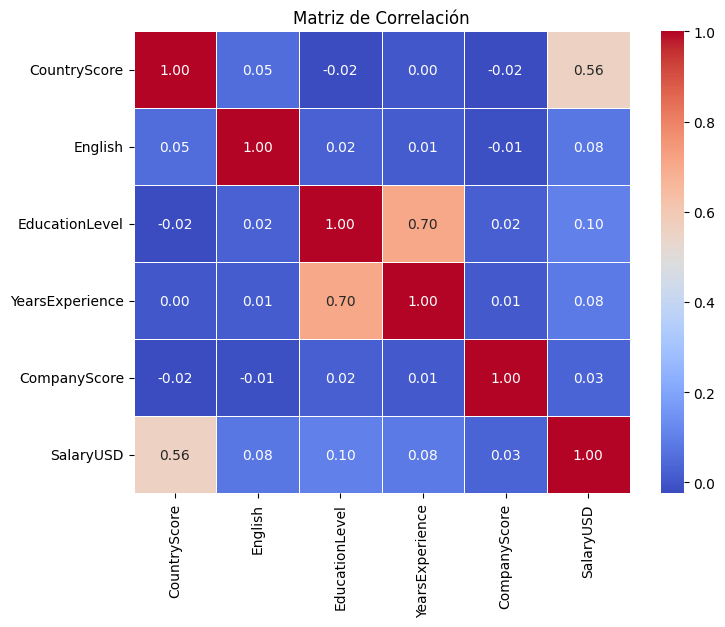

Coeficientes de correlación con SalaryUSD:
SalaryUSD          1.000000
CountryScore       0.557048
EducationLevel     0.099817
YearsExperience    0.084613
English            0.076612
CompanyScore       0.032178
Name: SalaryUSD, dtype: float64


In [88]:
matriz = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()
correlacionSalario = matriz['SalaryUSD'].sort_values(ascending=False)
print("Coeficientes de correlación con SalaryUSD:")
print(correlacionSalario)


### Comentario

Según los datos obtenidos, la variable que más se relaciona con el salario es CountryScore. El resto de variables tiene un correlación muy baja y por tanto no son del todo relevantes. Por lo tanto a mayor indice de innovación del país mejor deberia ser el salario obtenido

### 7. Construya gráficos de dispersión entre salarios y las demás variables. 

**a)** Genere un conjunto de gráficos de dispersión entre `SalaryUSD` y las demás variables, diferenciando por país.(Hint: Revise cuidadosamente la documentación y parámetros de la función `sns.pairplot()`). <br>
**b)** Analice los gráficos y comente, 
* ¿qué correlaciones puede identificar? 
* ¿varían estas correlaciones por país? 
* ¿son coherentes las conclusiones obtenidas a partir de los gráficos, con la matriz de correlación calculada en el punto 5?

*Funciones útiles:* `sns.pairplt()`

In [106]:
dfFiltrado

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
995,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Lead Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/lead-ruby-on...,NaN,1,1,4,5.924260,606
996,Guyana,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,https://gy.linkedin.com/jobs/view/sr-security-...,NaN,1,6,10,4.856359,1570
997,Guyana,Guyana,Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,1,5,6.040759,449
998,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,2,7,4.944933,696


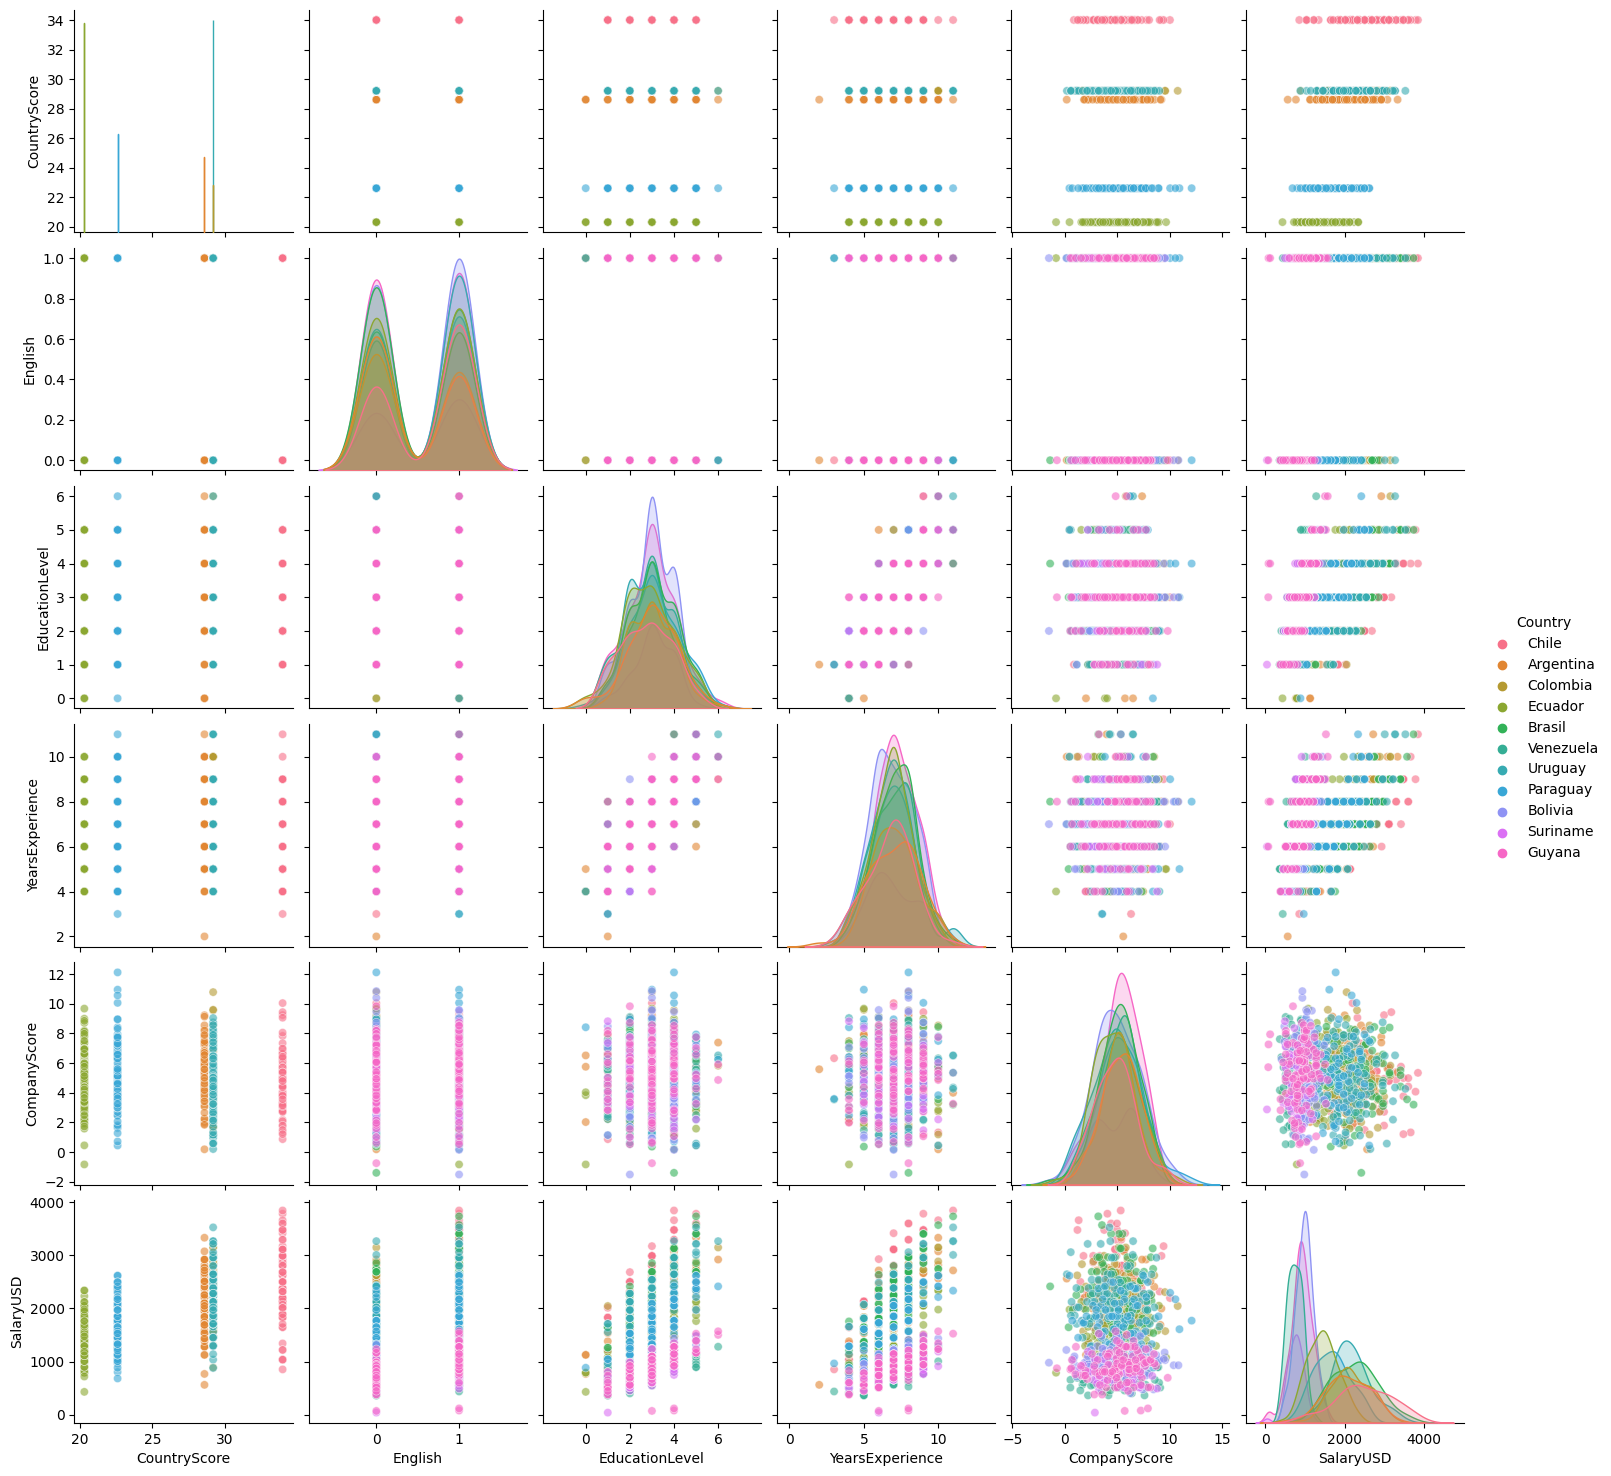

In [105]:
columnasRelevantes = ['Country', 'Title', 'Company', 'CountryScore', 'English', 'EducationLevel', 'YearsExperience', 'CompanyScore', 'SalaryUSD']
dfFiltradoRelevante = dfFiltrado[columnasRelevantes]
sns.pairplot(dfFiltradoRelevante, hue='Country', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()


### Comentarios

1. Lo primero a considerar es el gráfico de SalaryUSD en la diagonal. Este corresponde con lo obtenido en el grafico de distribucion de la pregunta 2
2. De la pregunta 5 sabemos que la mayor correlación se da entre las variables de EducationLevel y YearsExperience con un valor de 0.7. En nuestro gráfico vemos como dichos graficos de la matriz es aquel donde sus punto se distribuyen homogeneamente en una diagonal ascendente, lo que implica un correlación fuerte entre dichas variables. Para lo otros caso, apreciamos como su dispersión estan agrupadas como lineas verticales o horizonales, lo que indica una baja correlación.

### 8. Analice la correlación entre variables para un país en particular.

**a)** Seleccione los registros del Dataframe correspondientes a un país a su elección, y calcule nuevamente la matriz de correlación para este subconjunto de los datos. <br>
**b)** Analice: ¿Cómo varían sus resultados respecto a la matriz de confusión calculada con todos los datos en el punto 5? ¿Qué conclusión puede obtener a partir de esta comparación, que sea de utilidad para la construcción de un modelo predictivo de salarios?

*Funciones útiles:* `sns.heatmap()` ,`pd.corr()`

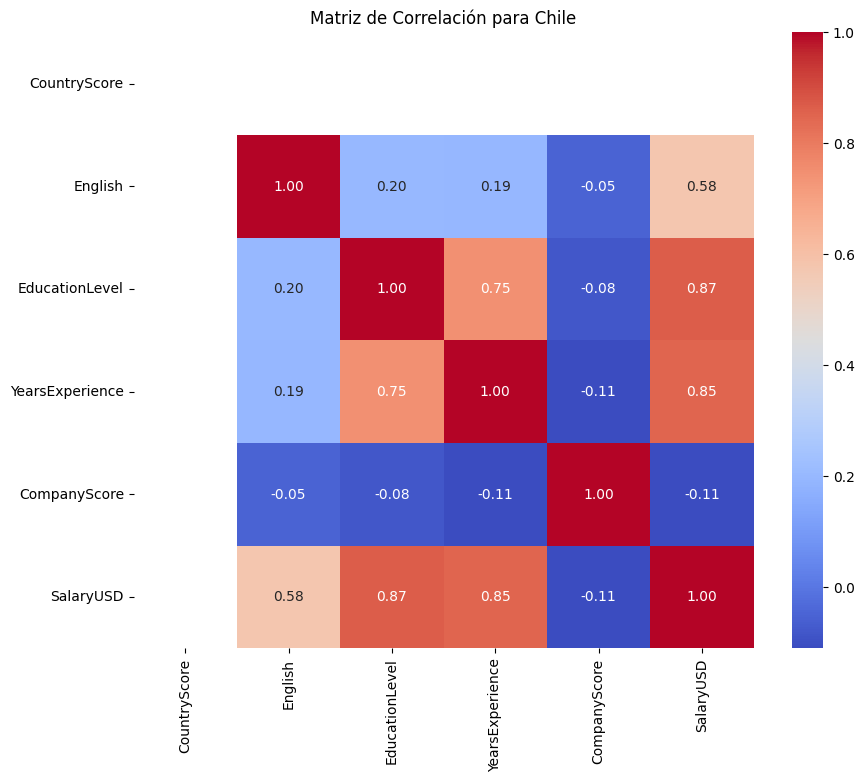

Coeficientes de correlación con SalaryUSD:
SalaryUSD          1.000000
EducationLevel     0.869594
YearsExperience    0.848497
English            0.577358
CompanyScore      -0.107196
CountryScore            NaN
Name: SalaryUSD, dtype: float64


In [114]:
df_chile = df[df['Country'] == 'Chile']
matrixChile = df_chile.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrixChile, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Chile')
plt.show()
correlacionSalario = matrixChile['SalaryUSD'].sort_values(ascending=False)
print("Coeficientes de correlación con SalaryUSD:")
print(correlacionSalario)



### comentarios

1. La matriz de correlación cambia considerablemente. Para chile existe una correlación muy fuerte entre muchas varibales como EducationLevel, YearsExperience y English.
2. Con estos resultados, podemos ajustar nuestro modelo para reflejar mejor las particularidades obtenidas para chile y asi mejorar la precisión de las predicciones salariales.  

### 9. Genere un modelo de regresión multilineal para todo el conjunto de datos.

**a)** Indique claramente las variables predictoras a incluir en su modelo de regresión, justificando su elección.
**b)** Implemente la regresión lineal utilizando la librería `statsmodel`.<br>
**c)** Imprima y analice el resumen de los resultados de la regresión, comente: ¿qué tan bueno o malo es el ajuste multilineal? ¿cuál es la importancia relativa de las distintas variables predictoras?<br>
**d)** Repita los puntos **b)** y **c)**, ahora con el subconjunto de datos del país elegido en el punto 7.¿Cómo cambian sus resultados respecto a la regresión obtenida en **b)**?<br>

*Funciones útiles:* `stasmodel` ,`sm.OLS(y,X)`,`model.fit()`,`results.summary()`

### A)

In [118]:
dfFiltrado

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
995,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Lead Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/lead-ruby-on...,NaN,1,1,4,5.924260,606
996,Guyana,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,https://gy.linkedin.com/jobs/view/sr-security-...,NaN,1,6,10,4.856359,1570
997,Guyana,Guyana,Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,1,5,6.040759,449
998,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,2,7,4.944933,696


In [143]:
import statsmodels.api as sm
dfGeneral = dfFiltrado.dropna()
X_general = dfGeneral[['CountryScore', 'EducationLevel']]
y_general = dfGeneral['SalaryUSD']
X_general = sm.add_constant(X_general)
model_general = sm.OLS(y_general, X_general)
results_general = model_general.fit()
print(results_general.summary())


                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     806.4
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          8.38e-159
Time:                        23:28:38   Log-Likelihood:                -3665.5
No. Observations:                 514   AIC:                             7337.
Df Residuals:                     511   BIC:                             7350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1213.6742     87.883    -13.

### Comentarios

1. Las variables predictoras utilzadas corresponden a las 2 variables que mayor correlación se obtuvo en el ejercicio 5. 
2. Se obtuvo un r^2 igual a 0.759 lo cual nos indica que nuestro modelo es capaz de predicir con una presicion mas que correcta. Sobre un 0.6 se considera aceptable.
3. la importancia de las varibles utilizadas radica en que si su correlacion es fuerte, el modelo tendra una mayor presición.

### Para el caso puntual de chile

In [137]:
dfChile

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
70,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,PMA Design,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,6,3.819441,2012
71,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,Enel Chile,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,2,7,3.141699,2499
72,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,Page Personnel,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,2,6,3.560487,1707
73,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Science SR,Cencosud S.A.,https://cl.linkedin.com/jobs/view/data-science...,34.0,1,2,6,9.051009,2317


In [141]:
X_chile = dfChile[['EducationLevel', 'YearsExperience', 'English', 'CompanyScore']]
y_chile = dfChile['SalaryUSD']
X_chile = sm.add_constant(X_chile)
model_chile = sm.OLS(y_chile, X_chile)
results_chile = model_chile.fit()
print("Resumen de la regresión para Chile:")
print(results_chile.summary())


Resumen de la regresión para Chile:
                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.284e+08
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          2.95e-236
Time:                        23:27:11   Log-Likelihood:                -4.9147
No. Observations:                  74   AIC:                             19.83
Df Residuals:                      69   BIC:                             31.35
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const 

### Comentarios

1. Las variables predictoras utilzadas corresponden a las 4 variables que mayor correlación se obtuvo en el ejercicio 8. 
2. Se obtuvo un r^2 igual a 1 lo cual nos indica un ajuste perfecto. En este punto no estoy seguro de que esto este bien debido al valor de r. 
